Mounting Google Drive

In [1]:

!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing libraries

In [2]:
import torch
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


from utils import (
   test, train, plot_losses

)

from model import Net
from torchsummary import summary

from torch.optim.lr_scheduler import StepLR
%matplotlib inline

Updating Device to CUDA

In [3]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
device = torch.device("cuda" if cuda else "cpu") #c2

CUDA Available? True


Defining data tranformations

In [4]:
train_transforms = transforms.Compose([
   #transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    #transforms.Resize((28, 28)),
    #transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])



Downloading MNIST dataset and splitting to train and test set

In [5]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

Creating Data Loaders from train data and test data

In [6]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

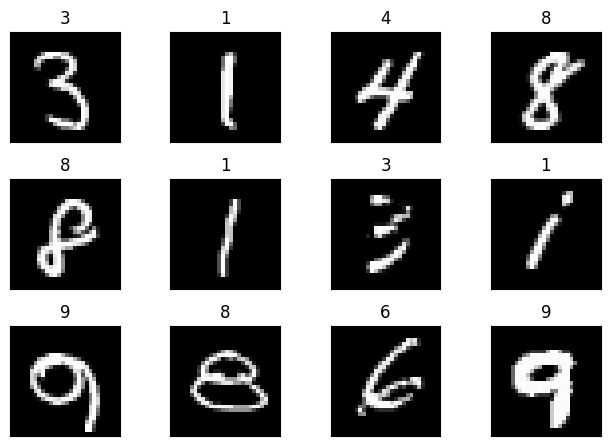

In [7]:
batch_data, batch_label = next(iter(train_loader))
fig = plt.figure()
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.tight_layout()
    plt.imshow(batch_data[i].squeeze(0), cmap='gray')
    plt.title(batch_label[i].item())
    plt.xticks([])
    plt.yticks([])
plt.show()

## Data Statistics

torch.Size([512, 1, 28, 28])
torch.Size([512])


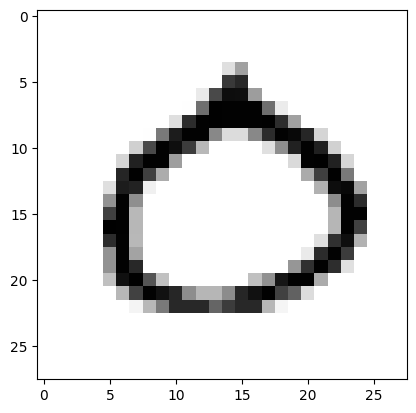

In [8]:
# train_data1 = train_data.train_data
# train_data = train_data.transform(train_data1.numpy())

# print('[Train]')
# print(' - Numpy Shape:', train_data.train_data.cpu().numpy().shape)
# print(' - Tensor Shape:', train_data.train_data.size())
# print(' - min:', torch.min(train_data))
# print(' - max:', torch.max(train_data))
# print(' - mean:', torch.mean(train_data))
# print(' - std:', torch.std(train_data))
# print(' - var:', torch.var(train_data))

dataiter = iter(train_loader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

Viewing images

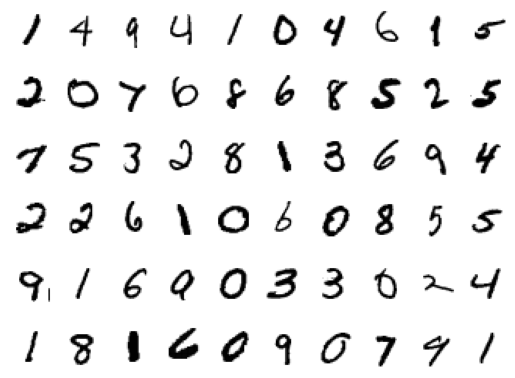

In [9]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

Transferring model to GPU and printing model summary

In [10]:
model1 = Net().to(device)
summary(model1, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


Training and evaluating the model

In [12]:
model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer)
    test(model, device, test_loader)

EPOCH: 0


Train: Loss=0.3918 Batch_id=117 Accuracy=45.53: 100%|██████████| 118/118 [00:18<00:00,  6.42it/s]


Test set: Average loss: 0.2780, Accuracy: 9169/10000 (91.69%)

EPOCH: 1


Train: Loss=0.1112 Batch_id=117 Accuracy=94.92: 100%|██████████| 118/118 [00:18<00:00,  6.49it/s]


Test set: Average loss: 0.0993, Accuracy: 9699/10000 (96.99%)

EPOCH: 2


Train: Loss=0.1186 Batch_id=117 Accuracy=97.23: 100%|██████████| 118/118 [00:15<00:00,  7.39it/s]


Test set: Average loss: 0.0646, Accuracy: 9797/10000 (97.97%)

EPOCH: 3


Train: Loss=0.1312 Batch_id=117 Accuracy=97.87: 100%|██████████| 118/118 [00:15<00:00,  7.62it/s]


Test set: Average loss: 0.0527, Accuracy: 9826/10000 (98.26%)

EPOCH: 4


Train: Loss=0.0280 Batch_id=117 Accuracy=98.42: 100%|██████████| 118/118 [00:17<00:00,  6.78it/s]


Test set: Average loss: 0.0423, Accuracy: 9862/10000 (98.62%)

EPOCH: 5


Train: Loss=0.0166 Batch_id=117 Accuracy=98.64: 100%|██████████| 118/118 [00:15<00:00,  7.61it/s]


Test set: Average loss: 0.0397, Accuracy: 9879/10000 (98.79%)

EPOCH: 6


Train: Loss=0.1023 Batch_id=117 Accuracy=98.78: 100%|██████████| 118/118 [00:15<00:00,  7.41it/s]


Test set: Average loss: 0.0366, Accuracy: 9889/10000 (98.89%)

EPOCH: 7


Train: Loss=0.0649 Batch_id=117 Accuracy=98.92: 100%|██████████| 118/118 [00:15<00:00,  7.62it/s]


Test set: Average loss: 0.0374, Accuracy: 9886/10000 (98.86%)

EPOCH: 8


Train: Loss=0.0081 Batch_id=117 Accuracy=99.03: 100%|██████████| 118/118 [00:15<00:00,  7.70it/s]


Test set: Average loss: 0.0330, Accuracy: 9896/10000 (98.96%)

EPOCH: 9


Train: Loss=0.0196 Batch_id=117 Accuracy=99.09: 100%|██████████| 118/118 [00:16<00:00,  7.21it/s]


Test set: Average loss: 0.0325, Accuracy: 9891/10000 (98.91%)

EPOCH: 10


Train: Loss=0.0043 Batch_id=117 Accuracy=99.16: 100%|██████████| 118/118 [00:15<00:00,  7.56it/s]


Test set: Average loss: 0.0378, Accuracy: 9887/10000 (98.87%)

EPOCH: 11


Train: Loss=0.0368 Batch_id=117 Accuracy=99.28: 100%|██████████| 118/118 [00:17<00:00,  6.87it/s]


Test set: Average loss: 0.0352, Accuracy: 9892/10000 (98.92%)

EPOCH: 12


Train: Loss=0.0169 Batch_id=117 Accuracy=99.30: 100%|██████████| 118/118 [00:15<00:00,  7.61it/s]


Test set: Average loss: 0.0333, Accuracy: 9901/10000 (99.01%)

EPOCH: 13


Train: Loss=0.0071 Batch_id=117 Accuracy=99.37: 100%|██████████| 118/118 [00:15<00:00,  7.46it/s]


Test set: Average loss: 0.0420, Accuracy: 9872/10000 (98.72%)

EPOCH: 14


Train: Loss=0.0073 Batch_id=117 Accuracy=99.40: 100%|██████████| 118/118 [00:15<00:00,  7.51it/s]


Test set: Average loss: 0.0293, Accuracy: 9917/10000 (99.17%)

EPOCH: 15


Train: Loss=0.0445 Batch_id=117 Accuracy=99.50: 100%|██████████| 118/118 [00:15<00:00,  7.55it/s]


Test set: Average loss: 0.0325, Accuracy: 9897/10000 (98.97%)

EPOCH: 16


Train: Loss=0.0006 Batch_id=117 Accuracy=99.56: 100%|██████████| 118/118 [00:16<00:00,  7.06it/s]


Test set: Average loss: 0.0329, Accuracy: 9905/10000 (99.05%)

EPOCH: 17


Train: Loss=0.0294 Batch_id=117 Accuracy=99.56: 100%|██████████| 118/118 [00:15<00:00,  7.48it/s]


Test set: Average loss: 0.0298, Accuracy: 9909/10000 (99.09%)

EPOCH: 18


Train: Loss=0.0024 Batch_id=117 Accuracy=99.67: 100%|██████████| 118/118 [00:15<00:00,  7.51it/s]


Test set: Average loss: 0.0318, Accuracy: 9906/10000 (99.06%)

EPOCH: 19


Train: Loss=0.0056 Batch_id=117 Accuracy=99.67: 100%|██████████| 118/118 [00:16<00:00,  7.03it/s]


Test set: Average loss: 0.0311, Accuracy: 9903/10000 (99.03%)



## Plot Losses

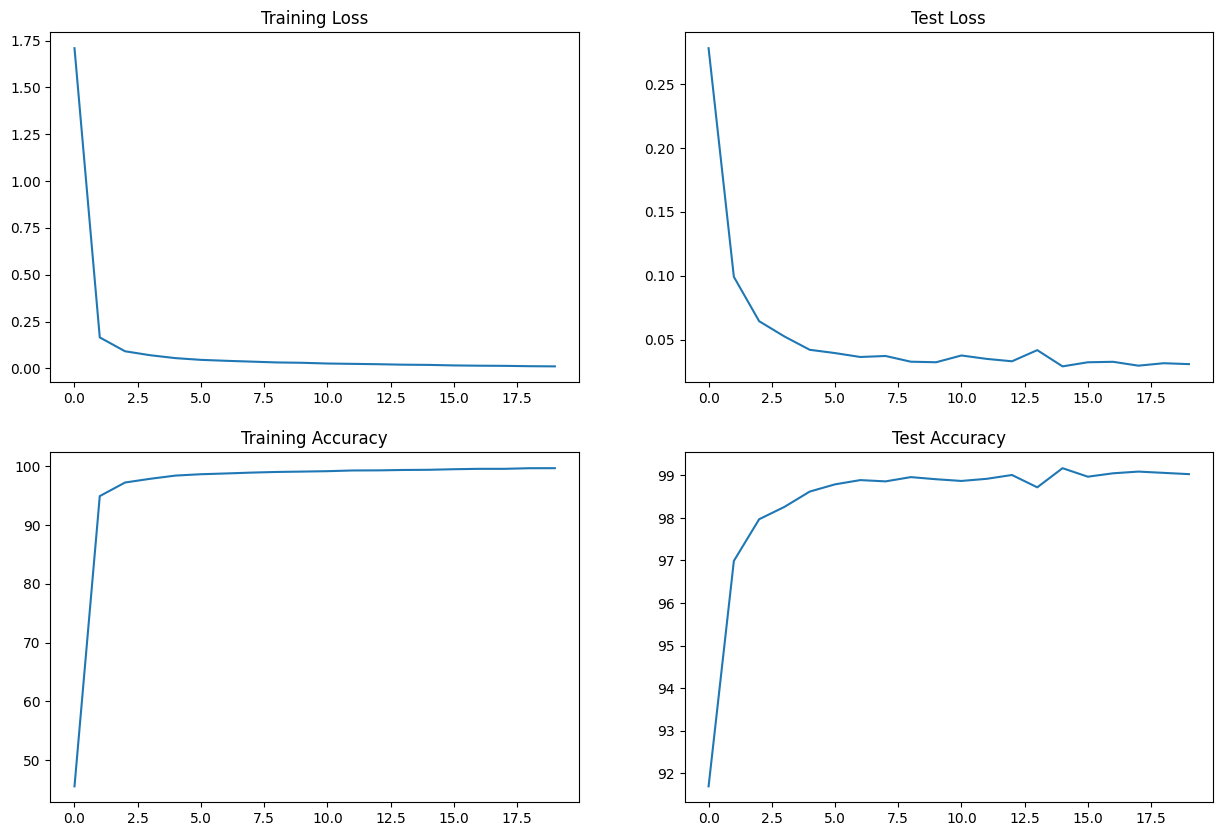

In [13]:
plot_losses()

# Objective:

* Get the everything setup correctly
* Set Transforms, DataLoader
* Set Basic Working code
* Set simple training and test logic

# Results:
* Total Parameters: > 5 M

* Best Training Accuracy: 99.67

* Best Test Accuracy: 99.17

#Analysis:
Heavy model which is over-fitting, which need to addressed in another step.